In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyLOESS import LOESS

# 1. 边界问题 测试

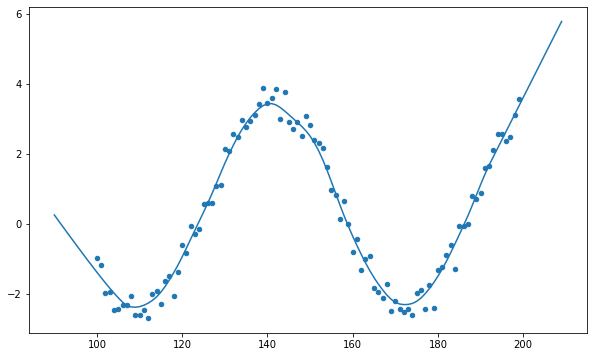

In [2]:
x = np.arange(100, 200, 1)
y = 3 * np.sin(x/10) + np.random.random(x.size)

x1 = np.arange(90, 210, 1)

k = 15
model = LOESS(k, istimeseries=True)
model.fit(x, y)
pred = model.predict(x1)

fig = plt.figure(figsize=(10, 6))
plt.plot(x1, pred)
plt.scatter(x, y, s=20)

# 2. 不同 ${K}$ 对结果的影响

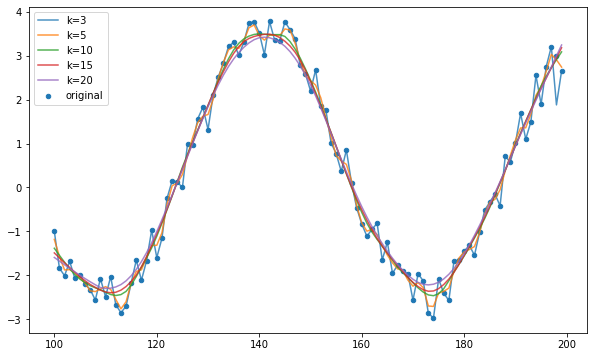

In [3]:
x = np.arange(100, 200, 1)
y = 3 * np.sin(x/10) + np.random.random(x.size)

x1 = np.arange(100, 200, 1)


fig = plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=20, label='original')
for k in [3, 5, 10, 15, 20]:
    model = LOESS(k, istimeseries=True)
    model.fit(x, y)
    pred = model.predict(x)
    plt.plot(x1, pred, alpha=0.8, label='k={0}'.format(k))
plt.legend()

# 3. istimeseries 参数 对比

Text(0.5, 1.0, 'Difference')

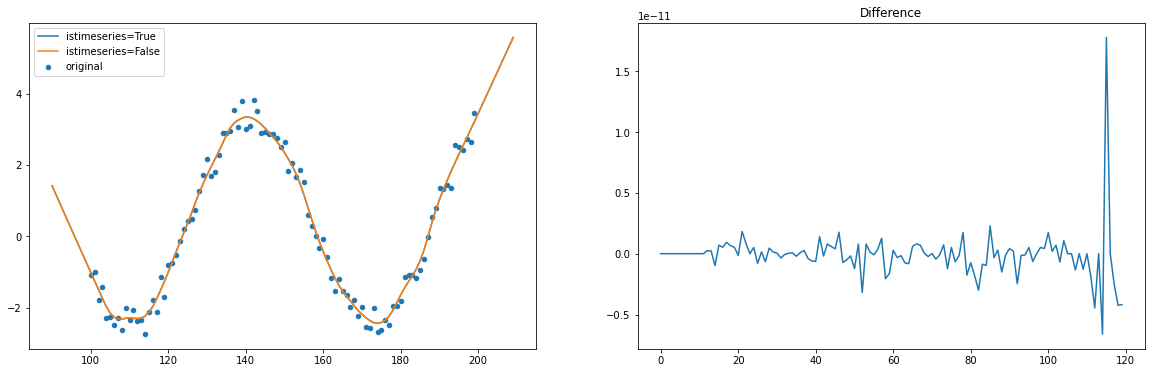

In [4]:
x = np.arange(100, 200, 1)
y = 3 * np.sin(x/10) + np.random.random(x.size)

x1 = np.arange(90, 210, 1)

k = 10
model = LOESS(k, istimeseries=True)
model.fit(x, y)
pred1 = model.predict(x1)

model = LOESS(k, kernel='bisquare', distance='manhattan', p='1', istimeseries=False)
model.fit(x.reshape(-1, 1), y)
pred2 = model.predict(x1.reshape(-1, 1))


fig = plt.figure(figsize=(20, 6))
ax1 = fig.add_subplot(121)
plt.scatter(x, y, s=20, label='original')
plt.plot(x1, pred1, label='istimeseries=True')
plt.plot(x1, pred2, label='istimeseries=False')
plt.legend()

ax2 = fig.add_subplot(122)
plt.plot(pred1-pred2)
plt.title('Difference')

# 4. 非等间距时间序列
对于非等间距，且乱序的散点，使用`istimeseries=Fals` 方法

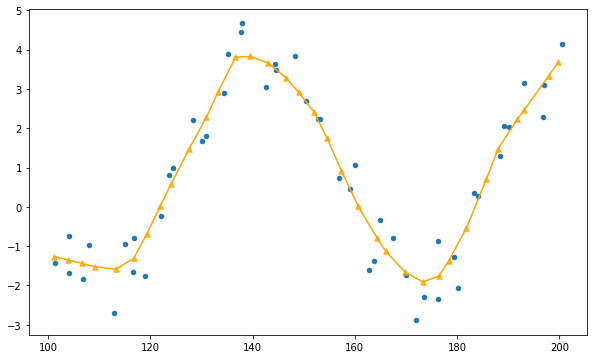

In [5]:
x = np.arange(100, 200, 2)
x = x + np.random.random(x.size) * 3
np.random.shuffle(x)
y = 3 * np.sin(x/10) + np.random.random(x.size)*2

x0 = np.arange(100, 200, 3)
x0 = x0 + np.random.random(x0.size) * 2
np.random.shuffle(x0)


model = LOESS(k, kernel='bisquare', distance='manhattan', p='1', istimeseries=False)
model.fit(x.reshape(-1, 1), y)
pred = model.predict(x0.reshape(-1, 1))

fig = plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=20)
plt.scatter(x0, pred, marker='^', alpha=0.8, s=30, color='orange')

index = np.argsort(x0)
plt.plot(x0[index], pred[index], color='orange')